## 📦 Importation des bibliothèques nécessaires
### - pandas, numpy : manipulation de données
### - matplotlib, seaborn : visualisation
### - train_test_split : division du dataset en ensembles d'entraînement/test
### - StandardScaler : normalisation des données pour KNN
### - KNeighborsClassifier : le modèle KNN utilisé pour la classification
### - %matplotlib inline : pour afficher les graphiques dans le notebook


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # ✅ Import correct
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

## 📂 Chargement des données
### Lecture du fichier CSV contenant les données sur les téléphones mobiles et leur gamme de prix.
### Le dataset est stocké dans une variable `dataset`.


In [2]:
dataset=pd.read_csv('mobile_prices.csv')

## 👀 Aperçu du dataset
### Affichage des 5 premières lignes du jeu de données pour comprendre la structure et les variables disponibles.


In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## ℹ️ Informations générales sur le dataset
### Cette commande affiche :
### - Le nombre total de lignes (entrées) et de colonnes (variables)
### - Le type de chaque colonne (int, float, etc.)
### - Le nombre de valeurs non nulles par colonne
### Cela permet de vérifier s'il y a des valeurs manquantes et de mieux comprendre la structure globale des données.


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 📊 Statistiques descriptives du dataset
### Cette commande affiche des statistiques résumées pour chaque variable numérique :
### - count : nombre de valeurs non nulles
### - mean : moyenne
### - std : écart-type
### - min, 25%, 50%, 75%, max : valeurs quartiles
#### Cela aide à comprendre la distribution des données et à repérer d'éventuelles anomalies ou outliers.


In [5]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 📊 Visualisation de la densité conjointe entre la RAM et la gamme de prix
### Ce graphique permet d'explorer la relation entre la RAM des téléphones (variable 'ram') et la gamme de prix (variable 'price_range').
### - L'axe X représente la RAM, tandis que l'axe Y représente la gamme de prix des téléphones.
### - L'option `color='red'` permet de colorier la densité en rouge.
### - L'option `kind='kde'` génère une estimation de densité par noyau (Kernel Density Estimation), 
###   ce qui permet d'observer la concentration des points de manière plus fluide.


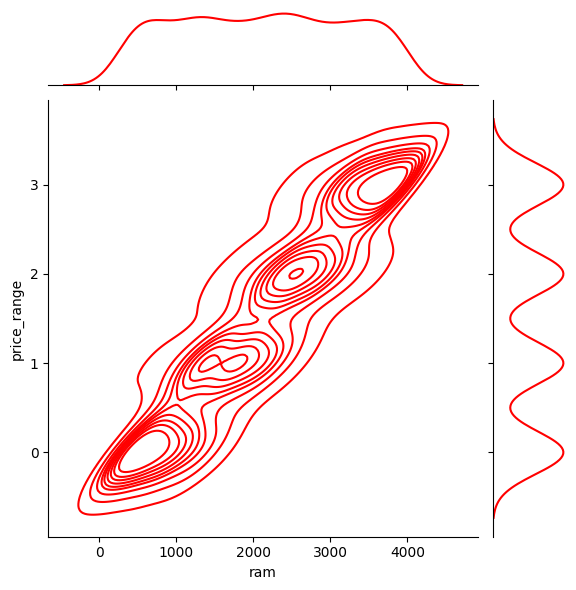

In [ ]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde')

## 📊 Visualisation des points de mémoire interne par gamme de prix
### Ce graphique montre la relation entre la mémoire interne (variable 'int_memory') et la gamme de prix (variable 'price_range').
### - L'axe X représente la gamme de prix des téléphones.
### - L'axe Y représente la mémoire interne des téléphones.
### - `sns.pointplot()` trace une ligne entre les points, montrant la tendance des valeurs moyennes de la mémoire interne pour chaque gamme de prix.


<Axes: xlabel='price_range', ylabel='int_memory'>

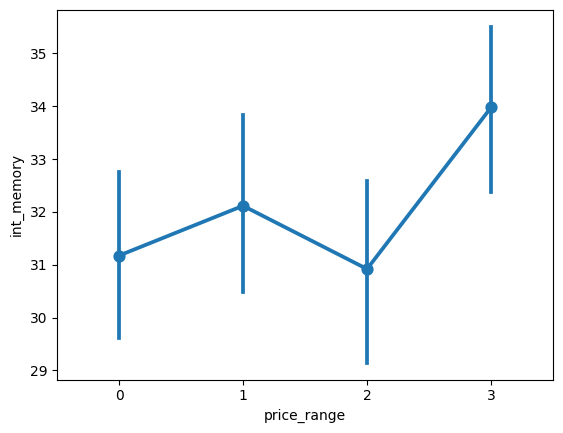

In [7]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

## 📊 Visualisation de la répartition de la prise en charge du 3G
### Ce graphique en secteurs montre la répartition des téléphones en fonction de la prise en charge de la 3G.
### - Les catégories sont '3G-supported' et 'Not supported', et les pourcentages indiquent la proportion de chaque catégorie dans le dataset.
### - `autopct='%1.1f%%'` permet d'afficher les pourcentages sur le graphique.
### - `shadow=True` ajoute un effet d'ombre pour améliorer l'esthétique.


In [ ]:
labels3G = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels3G, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## 📊 Visualisation de la répartition de la prise en charge du 4G
### Ce graphique en secteurs montre la répartition des téléphones en fonction de la prise en charge de la 4G.
### - Les catégories sont '4G-supported' et 'Not supported', et les pourcentages indiquent la proportion de chaque catégorie dans le dataset.
### - `autopct='%1.1f%%'` permet d'afficher les pourcentages sur le graphique.
### - `shadow=True` ajoute un effet d'ombre pour améliorer l'esthétique du graphique.


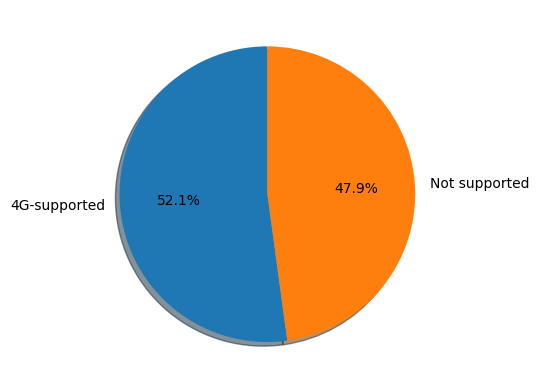

In [10]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## 📊 Visualisation de la distribution de la puissance de batterie par gamme de prix
### Ce graphique en boîte (boxplot) permet de visualiser la distribution de la puissance de la batterie ('battery_power') selon la gamme de prix ('price_range').
### - L'axe X représente les différentes gammes de prix des téléphones.
### - L'axe Y représente la puissance de la batterie des téléphones.
### - Le boxplot affiche les quartiles de la variable 'battery_power' pour chaque catégorie de 'price_range', ainsi que les valeurs aberrantes (outliers).


<Axes: xlabel='price_range', ylabel='battery_power'>

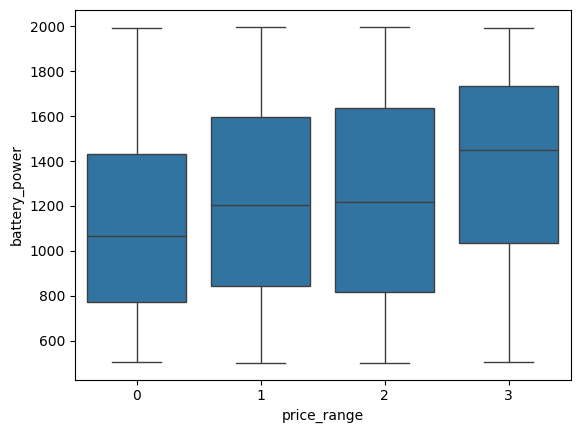

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

## 📊 Comparaison de la distribution des mégapixels des caméras frontale et principale
### Ce graphique permet de comparer la distribution des mégapixels de la caméra frontale ('fc') et de la caméra principale ('pc').
### - L'histogramme pour la caméra frontale est tracé en bleu avec un alpha de 0.5 pour une transparence partielle.
### - L'histogramme pour la caméra principale est tracé en rouge avec également un alpha de 0.5 pour la transparence.
### - La fonction `plt.legend()` permet d'ajouter une légende pour distinguer les deux histogrammes.
### - L'axe X représente les mégapixels des caméras.


Text(0.5, 0, 'MegaPixels')

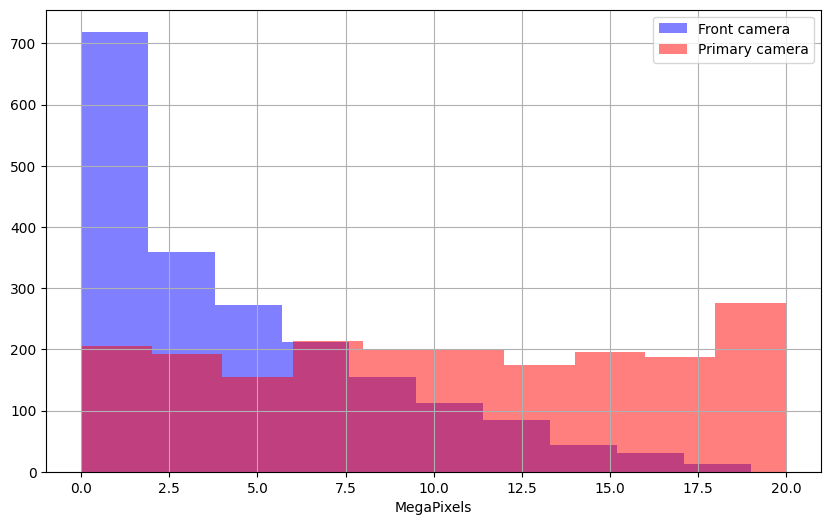

In [12]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

## 📊 Visualisation de la densité conjointe entre le poids du mobile et la gamme de prix
### Ce graphique montre la relation entre le poids du mobile ('mobile_wt') et la gamme de prix ('price_range').
### - L'axe X représente le poids des mobiles.
### - L'axe Y représente la gamme de prix des mobiles.
### - L'option `kind='kde'` génère une estimation de densité par noyau (Kernel Density Estimation), permettant de visualiser la concentration des données.


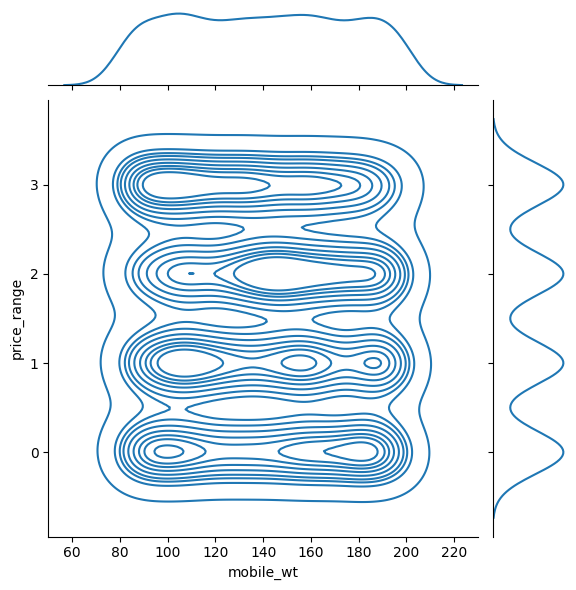

In [13]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde')

## 📊 Visualisation du temps de conversation par gamme de prix
### Ce graphique montre la relation entre le temps de conversation ('talk_time') et la gamme de prix ('price_range') des téléphones.
### - L'axe X représente les différentes gammes de prix des téléphones.
### - L'axe Y représente le temps de conversation des téléphones en heures.
### - Le graphique est tracé avec des points pour chaque gamme de prix, et une ligne connecte ces points pour montrer la tendance générale.


<Axes: xlabel='price_range', ylabel='talk_time'>

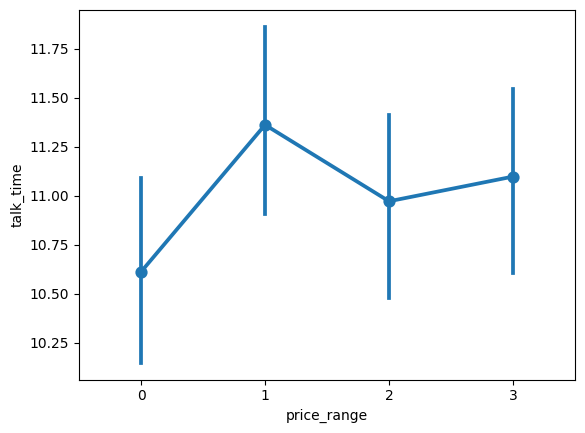

In [14]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

## 🎯 Séparation des variables explicatives et de la variable cible
### Ici, nous séparons les données en deux ensembles :
### - `X` contient toutes les variables explicatives (c'est-à-dire toutes les colonnes sauf 'price_range').
### - `y` contient la variable cible, ici 'price_range', qui représente la gamme de prix des téléphones.
### Cette séparation est essentielle pour entraîner un modèle de machine learning où `X` sera utilisé pour les caractéristiques et `y` pour les étiquettes.


In [15]:
X=dataset.drop('price_range',axis=1)
y=dataset['price_range']

## 🎯 Division des données en ensembles d'entraînement et de test
### Cette étape consiste à diviser les données en deux sous-ensembles :
### - `X_train` et `y_train` sont utilisés pour entraîner le modèle (70% des données).
### - `X_test` et `y_test` sont utilisés pour évaluer la performance du modèle sur des données non vues (30% des données).
### - `test_size=0.3` spécifie que 30% des données seront utilisées pour le test et 70% pour l'entraînement.
### - `random_state=11` permet de fixer une graine pour garantir la reproductibilité des résultats.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## 🤖 Initialisation du modèle de régression linéaire
### Ici, nous importons le modèle de régression linéaire de `sklearn.linear_model` et l'initialisons avec `lm = LinearRegression()`.
### - La régression linéaire est un modèle de prédiction qui établit une relation linéaire entre les variables explicatives et la variable cible.
### - Ce modèle peut être utilisé pour prédire une variable continue en fonction de plusieurs caractéristiques.


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

KNeighborsClassifier(n_neighbors=10)

## 🤖 Entraînement du modèle de régression linéaire
### Cette ligne entraîne le modèle de régression linéaire (`lm`) en utilisant les données d'entraînement (`X_train` pour les caractéristiques et `y_train` pour les étiquettes).
### - `lm.fit(X_train, y_train)` ajuste les coefficients du modèle pour minimiser l'erreur entre les prédictions et les vraies valeurs.
### Ce processus permet au modèle de "apprendre" la relation entre les variables explicatives et la variable cible avant de faire des prédictions sur les nouvelles données.


In [ ]:
lm.fit(X_train,y_train)

## 📊 Évaluation du modèle de régression linéaire
### Cette ligne évalue la performance du modèle de régression linéaire (`lm`) sur l'ensemble de test (`X_test`, `y_test`).
### - `lm.score(X_test, y_test)` calcule le coefficient de détermination R², qui mesure la proportion de la variance de la variable cible expliquée par le modèle.
### - Un R² proche de 1 indique que le modèle explique bien les données, tandis qu'un R² proche de 0


In [ ]:
lm.score(X_test,y_test)

c:\Users\multitech.ma\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\multitech.ma\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\multitech.ma\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\multitech.ma\AppData\Local\Programs\Python\Python313\L

0.9333333333333333

## 🤖 Entraînement et sauvegarde du modèle de régression logistique
### Cette étape permet d'entraîner un modèle de régression logistique et de le sauvegarder avec les noms des caractéristiques.
### - Le modèle `logistic_model = LogisticRegression()` est initialisé et entraîné en utilisant les données d'entraînement (`X_train` pour les caractéristiques et `y_train` pour les étiquettes).
### - `feature_names_log = X_train.columns.tolist()` extrait les noms des colonnes de `X_train` et les stocke dans une liste.
### - Le modèle et les noms des caractéristiques sont ensuite sauvegardés dans un fichier `.pkl` à l'aide de `pickle.dump()`, ce qui permet de charger facilement le modèle et les informations associées plus tard sans devoir réentraîner.


In [ ]:
# Entraînement
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
import pickle

# Sauvegarde avec les noms des colonnes
feature_names_log = X_train.columns.tolist()

with open("logistic_model.pkl", "wb") as f:
    pickle.dump((logistic_model, feature_names_log), f)
